# <center> <b>  SUPERMARKET X REPORT

![image.png](6124315_Screen_Shot_2022-09-14_at_09.52.17.png)

# TABLE CONTENTS

1. Data Overview
2. Data Processing
3. EDA
4. Models Building
5. Conclusion

## 1.1 Overview
This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file "Supermarket_X.csv". Within this file you will find the following fields:

1. Store - the store number
2. Date - the week of sales
3. Weekly_Sales - sales for the given store
4. Holiday_Flag - whether the week is a special holiday week (1 – Holiday week, 0 – Non-holiday week)
5. Temperature - Temperature on the day of sale
6. Fuel_Price - Cost of fuel in the region
7. CPI – Prevailing consumer price index
8. Unemployment - Prevailing unemployment rate

Holiday Events:
- Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\
- Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\
- Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\
- Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

##### Main task: Explore the dataset and create models to predict the sales (Weekly_Sales).

## 1.2 Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import matplotlib.cm as cm
import datetime as dt
warnings.filterwarnings("ignore")
from datetime import datetime
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.pipeline import make_pipeline


## 1.3 Import data

In [2]:
df = pd.read_csv('Supmarket_X.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


## 2. Data Processing

## Change the Date column to the correct datatime type.

In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

# Create Year, Month, Week, Day columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['Day'] = df['Date'].dt.day

# Display the modified DataFrame
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,39,28
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,40,5
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,41,12
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,42,19


## 3. EDA

### 3.1. Overall

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Year          6435 non-null   int32         
 9   Month         6435 non-null   int32         
 10  Week          6435 non-null   UInt32        
 11  Day           6435 non-null   int32         
dtypes: UInt32(1), datetime64[ns](1), float64(5), int32(3), int64(2)
memory usage: 509.1 KB


In [7]:
df.isnull().sum().to_frame().T

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day
0,0,0,0,0,0,0,0,0,0,0,0,0


**Comment**

There are no null values.

In [8]:
print('No Holiday', round(df['Holiday_Flag'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Holiday', round(df['Holiday_Flag'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Holiday 93.01 % of the dataset
Holiday 6.99 % of the dataset


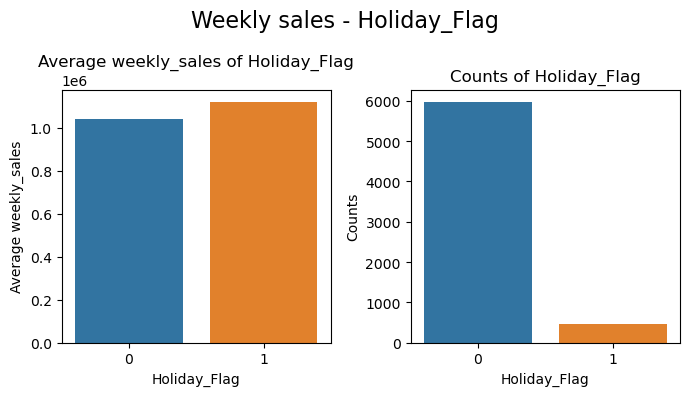

In [9]:
holiday_sale = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()
holiday_count = df.groupby('Holiday_Flag')['Weekly_Sales'].count()

fig, axes = plt.subplots(1,2, figsize=(7,4), dpi=100)

ax1 = sns.barplot(x=holiday_sale.index, y=holiday_sale.values, ax=axes[0])
ax1.set_title('Average weekly_sales of Holiday_Flag')
ax1.set_xlabel('Holiday_Flag')
ax1.set_ylabel('Average weekly_sales')

ax2 = sns.barplot(x=holiday_count.index,y=holiday_count.values, ax=axes[1])
ax2.set_title('Counts of Holiday_Flag')
ax2.set_xlabel('Holiday_Flag')
ax2.set_ylabel('Counts')

plt.suptitle('Weekly sales - Holiday_Flag', fontsize = 16)
fig.tight_layout()
plt.show()

**Comment**

This is a dataset with 93% data recorded during weekdays and approximately 7% recorded during holidays.

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

# Create Year, Month, Week, Day columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['Day'] = df['Date'].dt.day
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,39,28
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,40,5
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,41,12
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,42,19


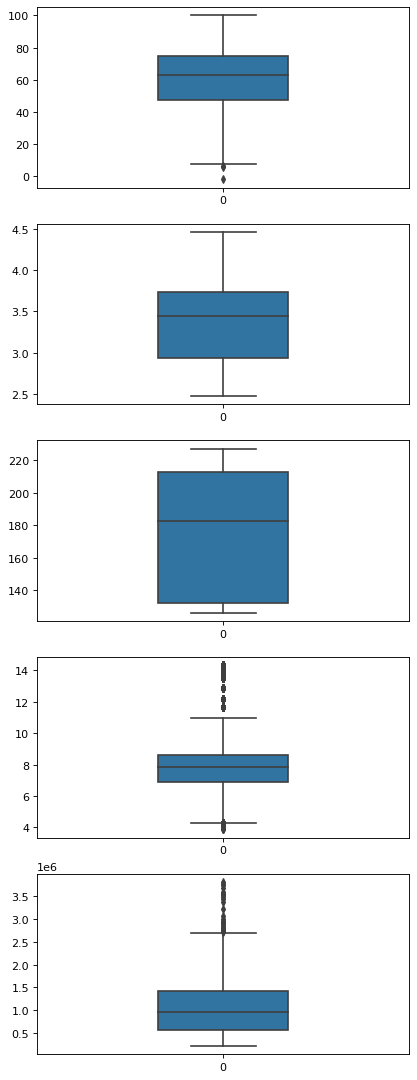

In [11]:
# Display data distribution of Temperature, Fuel Price, CPI, and Unemployment columns.
fig, axis = plt.subplots(5, figsize=(6,17), dpi=80)
x = df[['Temperature','Fuel_Price','CPI','Unemployment','Weekly_Sales']]

for i, column in enumerate(x):
    sns.boxplot(df[column], ax=axis[i], width=0.35)

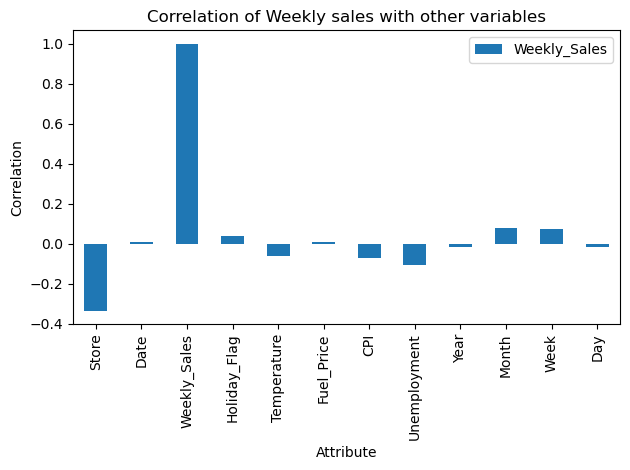

In [12]:
#Relationship of Weekly Sales among Temperature, FuelPrice, CPI, Holiday and Store
df_corr = df.corr()
ax=df_corr[['Weekly_Sales']].plot(kind='bar')
plt.xlabel('Attribute')
plt.ylabel('Correlation')
plt.title('Correlation of Weekly sales with other variables')
plt.tight_layout()
plt.show()

**Comment**

Features Store, Temperature, Unemployment, Fuel_Price, CPI, Holiday_Flag, Week, Month, Quarter, Year have a very weak correlation with Weekly_Sales (none is above 0.5)
We can see that Unemployment, CPI and Temperature has a negative correlation to the dependent variable. It makes sense because low CPI means price decrese, this make people have more ability to buy good. Low unemployment means people have job, stable economy makes sales increase. 

### 3.2. Sales Analysis

Text(0.5, 1.0, 'Yearly Sales')

<Figure size 1600x480 with 0 Axes>

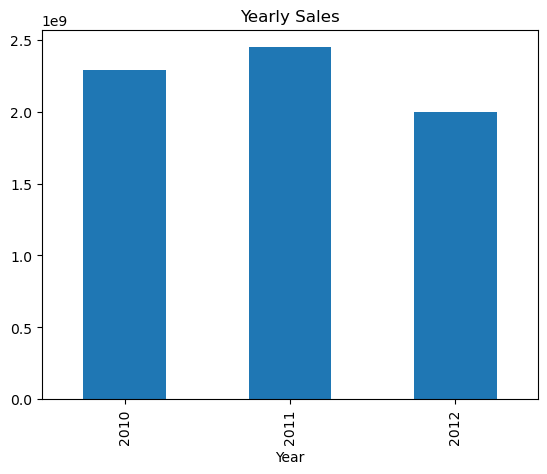

In [13]:
#Yearly view of sales
plt.figure(figsize=(20,6), dpi=80)
df.groupby('Year')[['Weekly_Sales']].sum().plot(kind='bar', legend=False)
plt.title('Yearly Sales')

**Comment**

The supermarket's annual revenue did not fluctuate too much over the years, the highest in 2011 and the lowest in 2012. However, the low result of 2012 may be affected because of the shortage of the data in the last years in 2012.

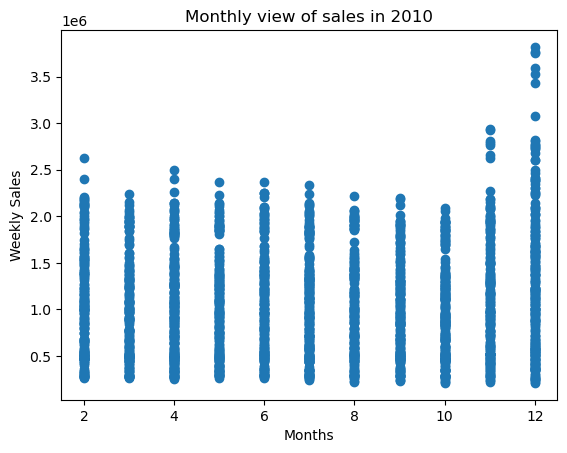

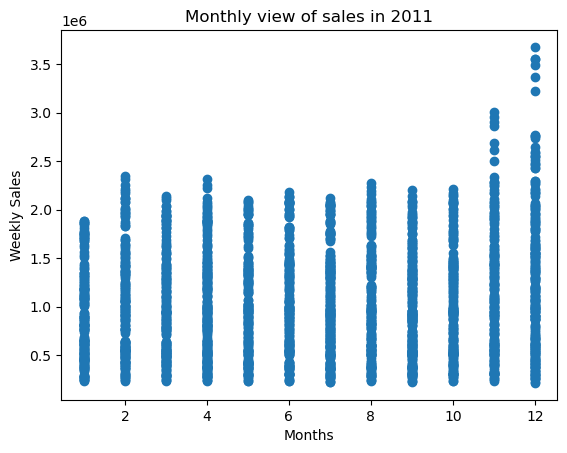

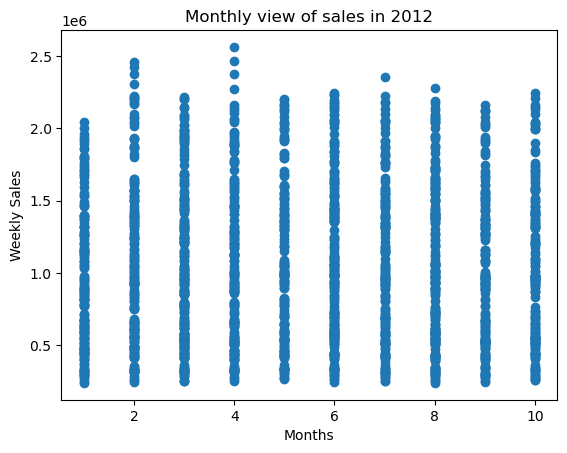

In [14]:
#Monthly view of sales for each years
plt.scatter(df[df.Year==2010]["Month"], df[df.Year==2010]["Weekly_Sales"])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2010")
plt.show()

plt.scatter(df[df.Year==2011]["Month"], df[df.Year==2011]["Weekly_Sales"])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2011")
plt.show()

plt.scatter(df[df.Year==2012]["Month"], df[df.Year==2012]["Weekly_Sales"])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2012")
plt.show()

**Comment**

- 2010 sales have a big difference between December compared to the rest of the year, with revenue in December recorded at about 380 million.
- December 2011 continued to record the largest revenue (about 400 million) and there was a very clear difference compared to the remaining months.
- In 2012, the difference between months is not too large, April recorded the largest total revenue (about 300 million).
- In general, it can be seen that in the end of the year of the whole period, sales will be much higher. The reason can be because Thanksgiving and Christmas are the most important events in the area, as important as Lunar New Year in Vietnam. Therefore, it makes sense when people spend more that make sales increase in this period.

### 3.3. Stores' Sales Analysis

<class 'numpy.float64'>


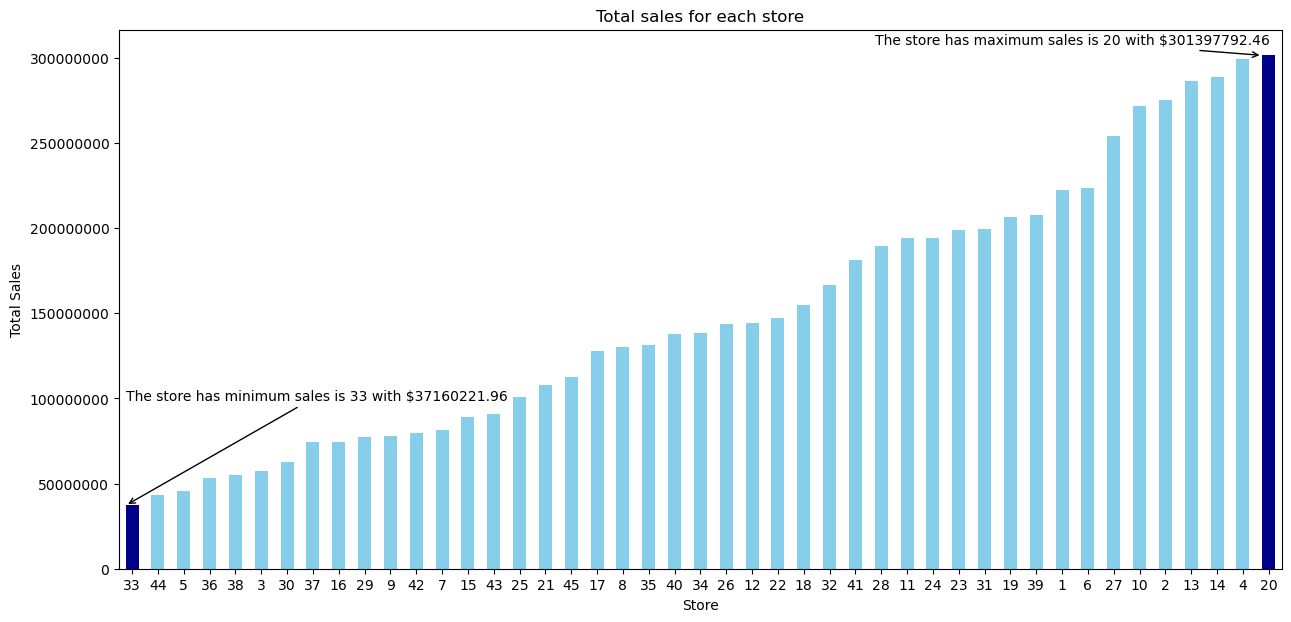

In [15]:
plt.figure(figsize=(15,7))

#Sum Weekly_Sales for each store, then sortded by total sales
total_sales_for_each_store = df.groupby('Store')['Weekly_Sales'].sum().sort_values() 
total_sales_for_each_store_array = np.array(total_sales_for_each_store) # convert to array

#Assigning a specific color for the stores have the lowest and highest sales
clrs = ['skyblue' if ((x < max(total_sales_for_each_store_array)) 
                             and (x > min(total_sales_for_each_store_array))) 
                        else 'darkblue' for x in total_sales_for_each_store_array]

ax = total_sales_for_each_store.plot(kind='bar',color=clrs);

#Store have minimum sales
p = ax.patches[0]
print(type(p.get_height()))
ax.annotate("The store has minimum sales is 33 with ${0:.2f}".format((p.get_height())), xy=(p.get_x(), p.get_height()), xycoords='data',
            xytext=(0.17, 0.32), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')


#Store have maximum sales 
p = ax.patches[44]
ax.annotate("The store has maximum sales is 20 with ${0:.2f}".format((p.get_height())), xy=(p.get_x(), p.get_height()), xycoords='data',
            xytext=(0.82, 0.98), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')


#Plot properties
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total sales for each store')
plt.xlabel('Store')
plt.ylabel('Total Sales');

**Comment**

- Store 33 has minimum sales with $37160221.96

- Store 20 has maximum sales with $301397792.46. The sale is 8 times higher than store 33
- From this record, supermarket X managers may consider policies to invest or develop store 20 as well as stores with high sales. Maybe they can discover the need of people in those areas and open more stores if necessary. In contrast, they need to find out reasons for the low sale of store 33 and others and solutions to improve sales, or else if sales is too low in comparison to costs, they may consider shuting down and invest to the more promising stores instead.

### 3.4. Holiday and Non_Holiday Sales Analysis

**Holiday Events:**

- Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

- Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

- Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

- Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

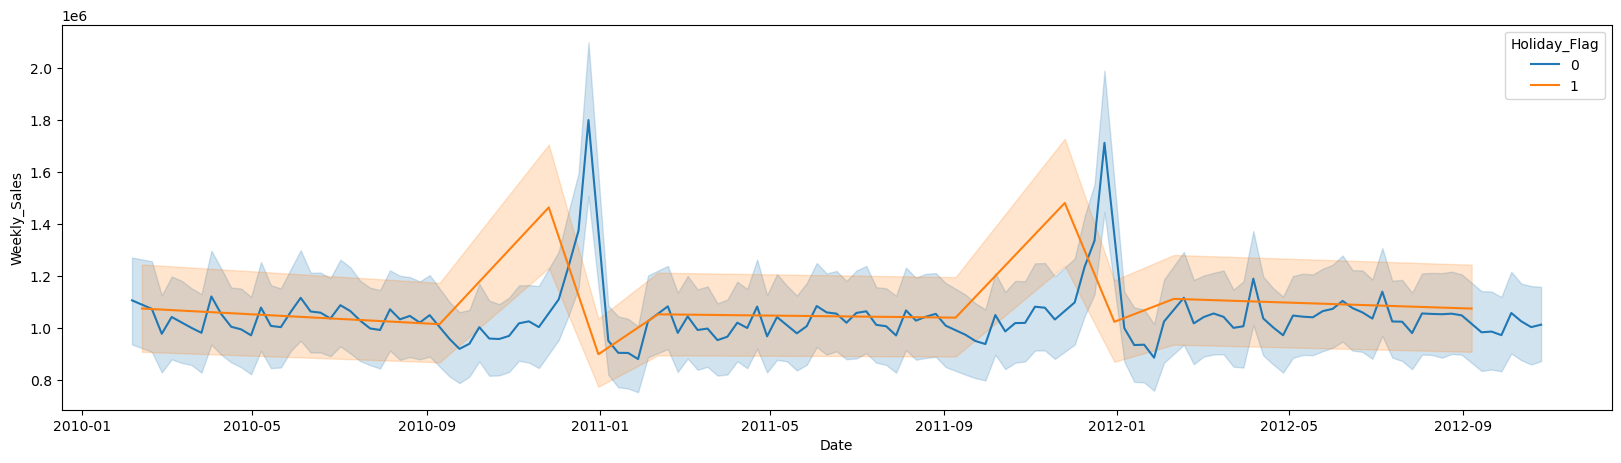

In [16]:
#Compare sales holiday vs sales non-holiday overtime
plt.figure(figsize=(20,5))
sns.lineplot(data=df, x="Date", y="Weekly_Sales", hue = "Holiday_Flag")
plt.show()

In [17]:
cont = df['Holiday_Flag'] == 1
df_holiday = df.loc[cont]
df_noholiday = df.loc[~cont]

# Avg sales holiday vs Avg sales non-holiday

print("Avg sales holiday:",df_holiday["Weekly_Sales"].mean())
print("Avg sales non-holiday:",df_noholiday["Weekly_Sales"].mean())

Avg sales holiday: 1122887.8923555557
Avg sales non-holiday: 1041256.3802088555


**Comment**

Comparing the performance of holiday sales versus non-holidays, it can be seen that on average, holidays have a higher volume of sales than weekdays.
From the chart, it can be predicted that there will be a rise in the following months of the timechain, because it will be November and December: holidays time. Therefore, stores may import more goods and store up more goods in warehouses for high needs in the following months.

In [19]:
# Compare sales by week among years
weekly_sales_2010 = df[df['Year']==2010]['Weekly_Sales'].groupby(df['Week']).mean()
weekly_sales_2011 = df[df['Year']==2011]['Weekly_Sales'].groupby(df['Week']).mean()
weekly_sales_2012 = df[df['Year']==2012]['Weekly_Sales'].groupby(df['Week']).mean()

plt.figure(figsize=(20,6))

sns.lineplot(weekly_sales_2010.index, weekly_sales_2010.values)
sns.lineplot(weekly_sales_2011.index, weekly_sales_2011.values)
sns.lineplot(weekly_sales_2012.index, weekly_sales_2012.values)

plt.grid()
plt.xticks(np.arange(1,60, step=1))
plt.legend(['2010', '2011', '2012'], loc='best')
plt.title('Average Weekly Sales Per Year')
plt.ylabel('Sales')
plt.xlabel('Week')

plt.show()

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 2000x600 with 0 Axes>

**Comment**

In 2010, 2011, the weeks of Thanksgiving and the first week before Christmas saw a sudden increase in revenue.
As can be seen, the sales trend from year to year is similar and tends to spike from week 46 to 52 - the last weeks of the year focus on many holidays. So it can be seen that holidays have a clear effect on the sales of the week.

In [20]:
Avg_H_Sales = df_holiday.groupby(["Year", "Month"])[["Weekly_Sales"]].mean()
Avg_NH_Sales = df_noholiday.groupby(["Year", "Month"])[["Weekly_Sales"]].mean()
Avg_H_Sales["Weekly_Sales_Holiday"] = Avg_H_Sales["Weekly_Sales"]

Avg_H_Sales_Y = Avg_H_Sales.drop(["Weekly_Sales"], axis = 1).style.format("{:.1f}")
Avg_H_Sales_Y

In [21]:
Avg_NH_Sales_Y = Avg_NH_Sales.style.format("{:.1f}")
Avg_NH_Sales_Y

**Comment**

It can be seen that in the months with holidays, the average sales of the holiday week is much higher than the average of the non-holiday week, specifically when looking at February 2010, November 2010, Super_Bowl and Thanksgiving are likely to attract more demand. Stores should have a high volumn of goods in storage to supply for the high needs of consumers.

#### Compare performance among holidays

In [22]:
#Create holiday ranges
Super_Bowl = ['2010-02-12', '2011-02-11', '2012-02-10']
Labour_Day =  ['2010-09-10', '2011-09-09', '2012-09-07']
Thanksgiving =  ['2010-11-26', '2011-11-25', '23-11-2012']
Christmas = ['2010-12-31', '2011-12-30', '28-12-2012']

In [23]:
df["Super_Bowl"] = np.where(df.Date.astype('string').isin(Super_Bowl), 1, 0) 
df["Labour_Day"] = np.where(df.Date.astype('string').isin(Labour_Day), 1, 0) 
df["Thanksgiving"] = np.where(df.Date.astype('string').isin(Thanksgiving), 1, 0) 
df["Christmas"] = np.where(df.Date.astype('string').isin(Christmas), 1, 0) 

In [24]:
#Contribution of each holiday to total holiday revenue
data_pie = [] 
data_pie.append(df.loc[df["Super_Bowl"] == 1]["Weekly_Sales"].sum())
data_pie.append(df.loc[df["Labour_Day"] == 1]["Weekly_Sales"].sum()) 
data_pie.append(df.loc[df["Thanksgiving"] == 1]["Weekly_Sales"].sum()) 
data_pie.append(df.loc[df["Christmas"] == 1]["Weekly_Sales"].sum())
labels = ["Super_Bowl", "Labour_Day", "Thanksgiving", "Christmas"]

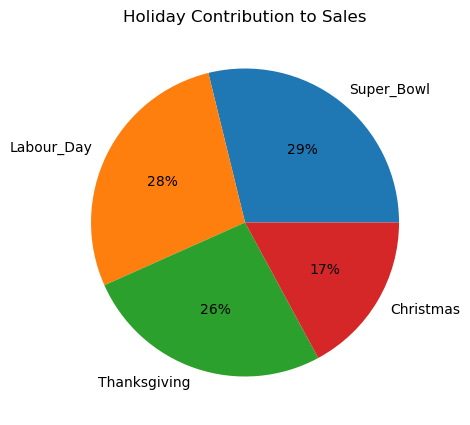

In [25]:
plt.figure(figsize=(5,5))
colors = sns.color_palette('bright')[0:4]
plt.title('Holiday Contribution to Sales')
plt.pie(data_pie, labels = labels, autopct='%.0f%%')
plt.show()

In [26]:
#Compare average sales for each week
Super_Bowl_Sales = df.loc[df["Super_Bowl"] == 1]["Weekly_Sales"].mean()
Labour_Day_Sales = df.loc[df["Labour_Day"] == 1]["Weekly_Sales"].mean()
Thanksgiving_Sales = df.loc[df["Thanksgiving"] == 1]["Weekly_Sales"].mean()
Christmas_Sales = df.loc[df["Christmas"] == 1]["Weekly_Sales"].mean()

Mean_Sales = {'Super_Bowl_Sales' : Super_Bowl_Sales,
              'Labour_Day_Sales': Labour_Day_Sales,
              'Thanksgiving_Sales':Thanksgiving_Sales,
              'Christmas_Sales': Christmas_Sales}

pd.DataFrame(Mean_Sales, index = range(len(Mean_Sales)))[:1].style.format("{:.1f}")

,Super_Bowl_Sales,Labour_Day_Sales,Thanksgiving_Sales,Christmas_Sales
0,1079128.0,1042427.3,1471273.4,960833.1


**Comment**

It can be seen that, although the total revenue from Super_bowl is the highest with 29%, the average revenue is far behind that of Thanksgiving.
Considering that the number of Super_Bowl weeks is higher than Thanksgiving, so the total revenue is higher is reasonable.
Out of 4 holidays, Thanksgiving is the holiday that customers spend the most.
As I know, SuperBowl is a big game holiday of rugby in America. This last for more weeks, but the main activity of people is just gathering and watchings games, so there won't be much difference in the purchasing of people, except food and beverage. However Thanksgiving and Christmas are the biggest events, as important as Lunar New Year in Vietnam, so people tend to buy new things as gifts and to decorate their house and prepare big party. So it makes sense.

## 4. Model building

#### Split data into train/test set

In [19]:
# Chọn các biến độc lập
selected_features = ['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment','Day', 'Weekly_Sales']

# Tạo DataFrame mới chỉ chứa các biến được chọn
df_selected = df[selected_features]

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = df_selected.drop('Weekly_Sales', axis=1)
y = df_selected['Weekly_Sales']


### 4.1 Linear Regression

#### Create Multiple linear regression objects and train the model using ['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Week', 'Day'] as features.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train[['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Day']], y_train)

LinearRegression()

In [26]:
# Thêm cột intercept vào X_train
X_train_with_intercept = sm.add_constant(X_train[['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Day']])

# Tạo mô hình Linear Regression
model = sm.OLS(y_train, X_train_with_intercept).fit()

# In thông tin về mô hình
print(model.summary())

# Dự đoán giá trị trên tập kiểm tra
X_test_with_intercept = sm.add_constant(X_test[['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Day']])
y_pred = model.predict(X_test_with_intercept)

# Tính MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Tính RSE
rse = np.sqrt(mse)
print(f'Residual Standard Error (RSE): {rse}')

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     24.49
Date:                Wed, 27 Dec 2023   Prob (F-statistic):           9.12e-29
Time:                        18:56:34   Log-Likelihood:                -75401.
No. Observations:                5148   AIC:                         1.508e+05
Df Residuals:                    5141   BIC:                         1.509e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.791e+06   8.96e+04     19.986   

In [21]:
y_hat_train = lr.predict(X_train[['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment','Day']])
print("R2 on training set", r2_score(y_train, y_hat_train))

R2 on training set 0.02778692750299161


In [22]:
y_hat_test = lr.predict(X_test[['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment','Day']])
print("R2 on testing set", r2_score(y_test, y_hat_test))

R2 on testing set 0.016778325871974697


#### Distribution of the predicted values of the training/testing data

In [23]:
def distribution_plot(ax, x_value, y_value, x_label, y_label, title):
    """
    Params:
     :x_value(array): 
     :y_value(array):
     :x_label(str): 
     :y_label(str):
     :title(str):
    
    Returns
    """
    sns.kdeplot(x_value, color="r", label=x_label, ax=ax)
    sns.kdeplot(y_value, color="b", label=y_label, ax=ax)

    ax.set_title(title)
    ax.legend()

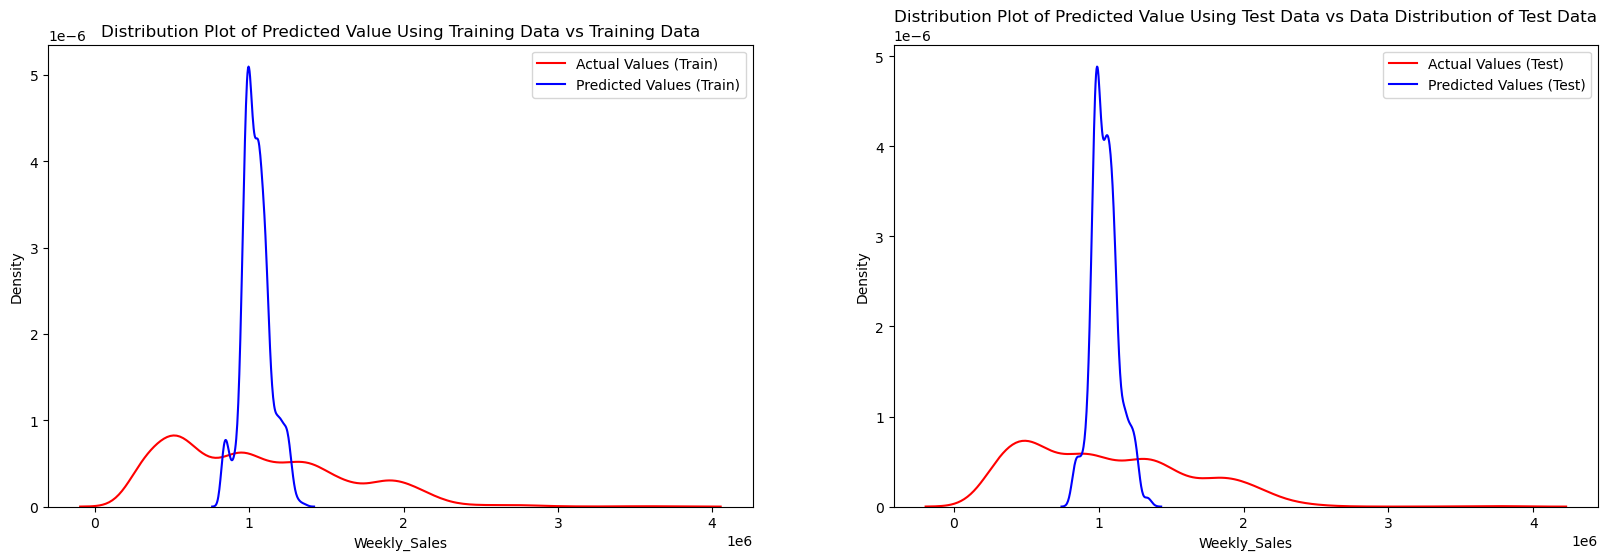

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
title1 = 'Distribution Plot of Predicted Value Using Training Data vs Training Data'
distribution_plot(axs[0], y_train, y_hat_train, "Actual Values (Train)", "Predicted Values (Train)", title1)

title2 = 'Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
distribution_plot(axs[1], y_test, y_hat_test, "Actual Values (Test)","Predicted Values (Test)", title2)
plt.show()

### 4.2 Lasso Regression

In [28]:
# Lasso Regression
lasso_model = Lasso(alpha=0.01)  # Có thể điều chỉnh giá trị alpha theo yêu cầu
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
lasso_coef = lasso_model.coef_  # Lấy các hệ số của mô hình Lasso
print(f"Lasso Regression MSE: {lasso_mse}")
print(f"Lasso Regression R2 Score: {lasso_r2}")
print(f"Lasso Regression Coefficients: {lasso_coef}")

Lasso Regression MSE: 316749347974.2211
Lasso Regression R2 Score: 0.016778333299909742
Lasso Regression Coefficients: [ 88478.90787786   -480.34449069 -19241.64440014  -1649.10418664
 -43910.74304977  -1506.86907779]


#### R2 Score is about 0.0274. An R2 value close to 0 indicates that the model does not explain the variation in the data.

#### Find 'best' $\alpha$ (a hypeparams in Regularization)

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Generate a series of alpha values for testing
alphas = np.logspace(-4, 4, 9)

# Experiment on a grid of alpha values to find the best value
param_grid = {'alpha': alphas}
lasso_model = Lasso(random_state=42)
lasso_grid = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)
best_alpha = lasso_grid.best_params_['alpha']
best_lasso_model = lasso_grid.best_estimator_
print(f"Best alpha: {best_alpha}")
print(f"Lasso Regression MSE with best alpha: {-lasso_grid.best_score_}")


Best alpha: 10.0
Lasso Regression MSE with best alpha: 309505627559.2483


#### Evaluate performance on test set

In [30]:
lasso_predictions_test = best_lasso_model.predict(X_test)
mse_test = mean_squared_error(y_test, lasso_predictions_test)
r2_test = r2_score(y_test, lasso_predictions_test)
print(f"Lasso Regression MSE on Test Set: {mse_test}")
print(f"Lasso Regression R2 Score on Test Set: {r2_test}")


Lasso Regression MSE on Test Set: 316746959946.44525
Lasso Regression R2 Score on Test Set: 0.016785745977047073


#### Lasso Regression: Predicted vs. Actual

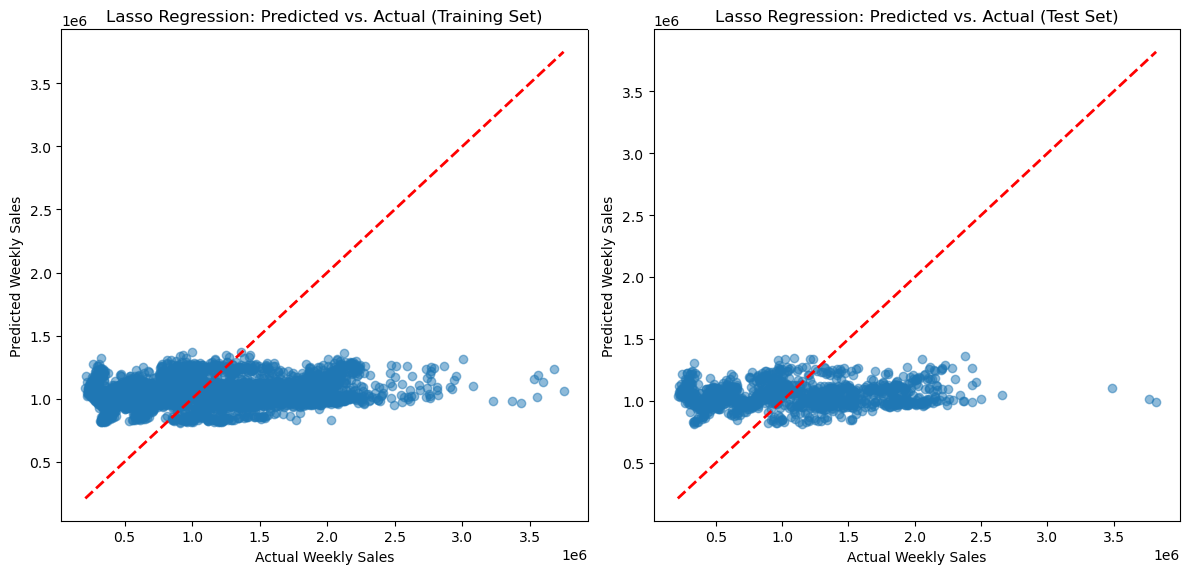

In [44]:
lasso_predictions_train = best_lasso_model.predict(X_train)

plt.figure(figsize=(12, 6))

# Train 
plt.subplot(1, 2, 1)
plt.scatter(y_train, lasso_predictions_train, alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--', color='red', linewidth=2)
plt.title("Lasso Regression: Predicted vs. Actual (Training Set)")
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")

# Test
plt.subplot(1, 2, 2)
plt.scatter(y_test, lasso_predictions_test, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)
plt.title("Lasso Regression: Predicted vs. Actual (Test Set)")
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")

plt.tight_layout()
plt.show()


### 4.3 Random Forest

In [45]:
# RandomForest Regression
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Có thể điều chỉnh số cây (n_estimators) theo yêu cầu
rf_model.fit(X1_train, y1_train)
y1_pred = rf_model.predict(X1_test)



In [46]:
rf_mse = mean_squared_error(y1_test, y1_pred)
rf_r2 = r2_score(y1_test, y1_pred)
rf_feature_importance = rf_model.feature_importances_  # Lấy độ quan trọng của đặc trưng
print(f"RandomForest Regression MSE: {rf_mse}")
print(f"RandomForest Regression R2 Score: {rf_r2}")
print(f"RandomForest Regression Feature Importance: {rf_feature_importance}")

RandomForest Regression MSE: 294174605462.99713
RandomForest Regression R2 Score: 0.08685259264461243
RandomForest Regression Feature Importance: [0.00827514 0.24035206 0.1240579  0.24996422 0.31150658 0.06584409]


<Axes: >

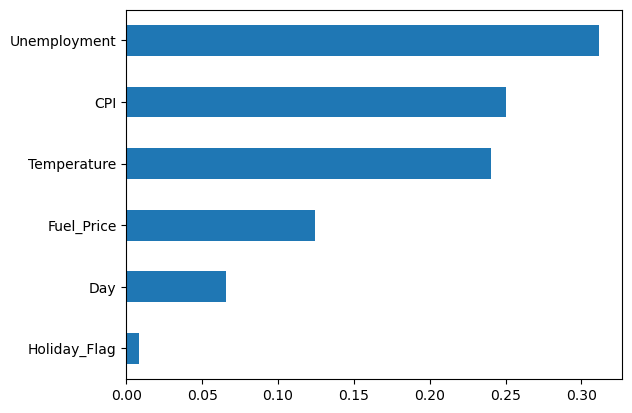

In [47]:
weights_rf = pd.Series(rf_feature_importance,
                 index=X.columns.values)
weights_rf.sort_values()[-10:].plot(kind = 'barh')

## Random Forest Model Tuning

In [48]:
import shap

In [49]:
RandomForestRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Tạo một loạt các giá trị tham số cần thử nghiệm
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Tìm kiếm trên lưới các giá trị tham số
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X1_train, y1_train)




GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [51]:
# In ra giá trị tham số tốt nhất và kết quả
best_rf_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_
print("Best Random Forest Parameters:", best_rf_params)


Best Random Forest Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [52]:
# Đánh giá hiệu suất trên tập kiểm tra
rf_predictions_test = best_rf_model.predict(X1_test)
rf_mse_test = mean_squared_error(y_test, rf_predictions_test)
rf_r2_test = r2_score(y_test, rf_predictions_test)
print(f"Random Forest Regression MSE on Test Set: {rf_mse_test}")
print(f"Random Forest Regression R2 Score on Test Set: {rf_r2_test}")

Random Forest Regression MSE on Test Set: 230074596405.70572
Random Forest Regression R2 Score on Test Set: 0.2858254339270837


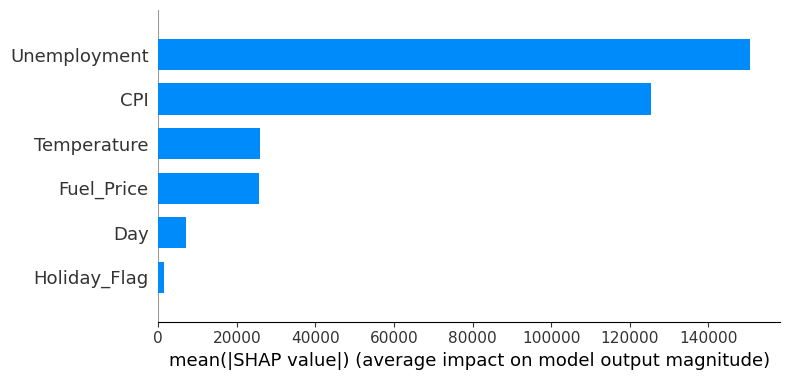

In [54]:
# Tính giá trị Shapley
explainer = shap.TreeExplainer(best_rf_model)
shap_values = explainer.shap_values(X_test)

# Vẽ biểu đồ beeswarm
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.show()

# 5. Conclusion

The main objective of this study is to build a model to predict the sales of Supermarket X based on available historical data and determine whether factors such as temperature, unemployment, fuel prices, etc. have an impact on the weekly sales of the specific stores under study. The study also aimed to understand whether sales are higher on holidays such as Christmas and Thanksgiving compared to normal days so that stores can create promotions to enhance sales. sales, prepare larger inventories before the holidays, thereby generating higher sales and avoiding out-of-stock situations. For the specific factors provided in the study (temperature, unemployment, CPI and fuel prices), it is observed that sales tend to increase slightly in favorable climate conditions as well. like when fuel prices are cheap. However, it is not possible to draw a firm conclusion about this assumption due to the limited scope of the train data set in this study.
Trying to determine the relationship between independent variables and dependent variables through building Linear regression, Lasso Regression, Random Forest models. The conclusion is that the performance of the Random Forest model is much more significant than the performance of the remaining regression models, it can be concluded that there is a nonlinear relationship between the independent and dependent variables.